# Sheet#3 Normalized Cut and Kmeans Clustering

## Question One on Kmeans Clustering

**Use the k-means algorithm and Euclidean distance to cluster the following 8 examples
into 3 clusters.**

*Data Set Input*: 

| Point 	| x 	| y  	|
|-------	|---	|----	|
| A1    	| 2 	| 10 	|
| A2    	| 2 	| 5  	|
| A3    	| 8 	| 4  	|
| A4    	| 5 	| 8  	|
| A5    	| 7 	| 5  	|
| A6    	| 6 	| 4  	|
| A7    	| 1 	| 2  	|
| A8    	| 4 	| 9  	|

In [220]:
#imports cell 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.metrics.pairwise import rbf_kernel as rbf

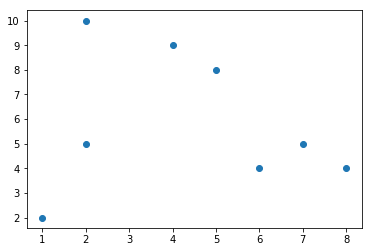

In [5]:
#Loading and visulaizing the dataset.
dataSet = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
plt.scatter(dataSet[:,0],dataSet[:,1]);

In [80]:
#to compute distance between the 2 points.
def Distance(x,y):  
    dist = np.sum(np.abs(x-y)**2,axis=-1)**(1./2) 
    return dist  

**Suppose that the initial seeds (centers of each cluster) are A1, A4 and A7. Run the
k-means algorithm for 1 epoch only.**

In [237]:
def kmeans(data, num_clusters = 2, tolerance=0.0001, max_iter = 300, init_seed = None):
    iter_num = 0
    # Number of training data
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]
    # Generate random centers, here i use standard devation and mean to ensure it represents the whole data
    if(init_seed == None):
        mean = np.mean(data, axis = 0)
        std = np.std(data, axis = 0)
        centroids = np.random.randn(num_clusters,c)*std + mean
    else:
        centroids = init_seed
        
    # to store old centers        
    old_centroids = np.zeros(centroids.shape) 
    # Store new centers
    new_centroids = deepcopy(centroids) 
    #generate error vector
    error = np.linalg.norm(new_centroids - old_centroids)
    #create clusters array
    clusters = np.zeros(n)
    #create distaces array
    distances = np.zeros((n,num_clusters))
    # When, after an update, the estimate of that center stays the same, exit loop
    while error > tolerance and iter_num < max_iter:
        iter_num +=1
        # Measure the distance to every center
        for i in range(num_clusters):
            distances[:,i] = np.linalg.norm(data - new_centroids[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)
        old_centroids = deepcopy(new_centroids)
        # Calculate mean for every cluster and update the center
        for i in range(num_clusters):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(new_centroids - old_centroids)
        
    return new_centroids,clusters,error,iter_num

#### Epoch 1

In [143]:
#running the algorithm for one epoch only and for initial seed given.
centroids, clusters, error,numofiter = kmeans(dataSet,num_clusters=3,max_iter=1, 
                                              init_seed = np.array([dataSet[0],dataSet[3],dataSet[6]]))
print("Centroids are : ",centroids)
print("Points assigned to Cluster : ",clusters)
print("Error : ",error)

Centroids are :  [[ 2 10]
 [ 6  6]
 [ 1  3]]
Points assigned to Cluster :  [0 2 1 1 1 1 2 1]
Error :  2.449489742783178


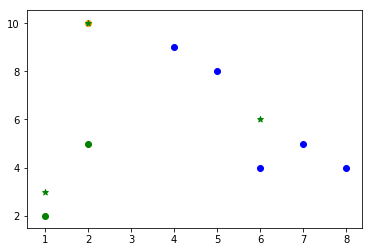

In [151]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(dataSet.shape[0]):
    plt.scatter(dataSet[i, 0], dataSet[i,1],color = colors[clusters[i]])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g')

**After 1 epoch :<br>**
*New Clusters:* <br>
Cluster 1, Orange [2,10]<br>
Cluster 2, Blue [8,4],[5,8],[7,5],[6,4],[4,9]<br>
Cluster 3, Green [1,2],[2,5]<br>
*New Centers:*<br>
Center 1 : [2,10]<br>
Center 2 : [6,6]<br>
Center 3 : [1,3]<br>


**d. How many more iterations are needed to converge? Draw the result for each
epoch.**

#### Epoch 2

In [152]:
#running the algorithm for two epoch only and for initial seed given.
centroids, clusters, error,numofiter = kmeans(dataSet,num_clusters=3,max_iter=2, 
                                              init_seed = np.array([dataSet[0],dataSet[3],dataSet[6]]))
print("Centroids are : ",centroids)
print("Points assigned to Cluster : ",clusters)
print("Error : ",error)

Centroids are :  [[3 9]
 [6 5]
 [1 3]]
Points assigned to Cluster :  [0 2 1 1 1 1 2 0]
Error :  1.7320508075688772


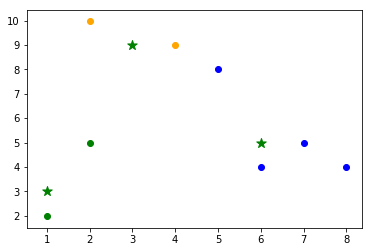

In [154]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(dataSet.shape[0]):
    plt.scatter(dataSet[i, 0], dataSet[i,1],color = colors[clusters[i]])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g',s=100)

#### Epoch 3

In [157]:
#running the algorithm for three epoch only and for initial seed given.
centroids, clusters, error,numofiter = kmeans(dataSet,num_clusters=3,max_iter=3, 
                                              init_seed = np.array([dataSet[0],dataSet[3],dataSet[6]]))
print("Centroids are : ",centroids)
print("Points assigned to Cluster : ",clusters)
print("Error : ",error)

Centroids are :  [[3 9]
 [7 4]
 [1 3]]
Points assigned to Cluster :  [0 2 1 0 1 1 2 0]
Error :  1.4142135623730951


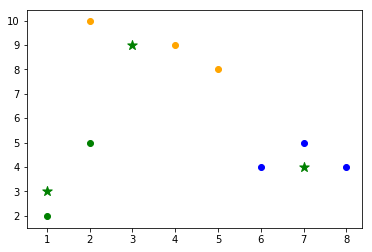

In [158]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(dataSet.shape[0]):
    plt.scatter(dataSet[i, 0], dataSet[i,1],color = colors[clusters[i]])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g',s=100)

#### Epoch 4

In [161]:
#running the algorithm for four epoch only and for initial seed given.
centroids, clusters, error,numofiter = kmeans(dataSet,num_clusters=3,max_iter=4, 
                                              init_seed = np.array([dataSet[0],dataSet[3],dataSet[6]]))
print("Centroids are : ",centroids)
print("Points assigned to Cluster : ",clusters)
print("Error : ",error)

Centroids are :  [[3 9]
 [7 4]
 [1 3]]
Points assigned to Cluster :  [0 2 1 0 1 1 2 0]
Error :  0.0


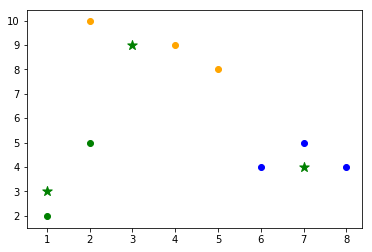

In [162]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(dataSet.shape[0]):
    plt.scatter(dataSet[i, 0], dataSet[i,1],color = colors[clusters[i]])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g',s=100)

#### The algorithm took 3 iterations or epochs to converge since the fourth iteration doesn't add any information to the clusters and the centroids and clusters stay the same for the rest of any number of itertaions.

## Question 2 on Normalized Cut

**Given the graph below. The weight on each edge is the affinity between two nodes.
Consider the two cuts C1 and C2 and in the graph. For each cut, compute the values of the graph cut and the
normalized cut.**

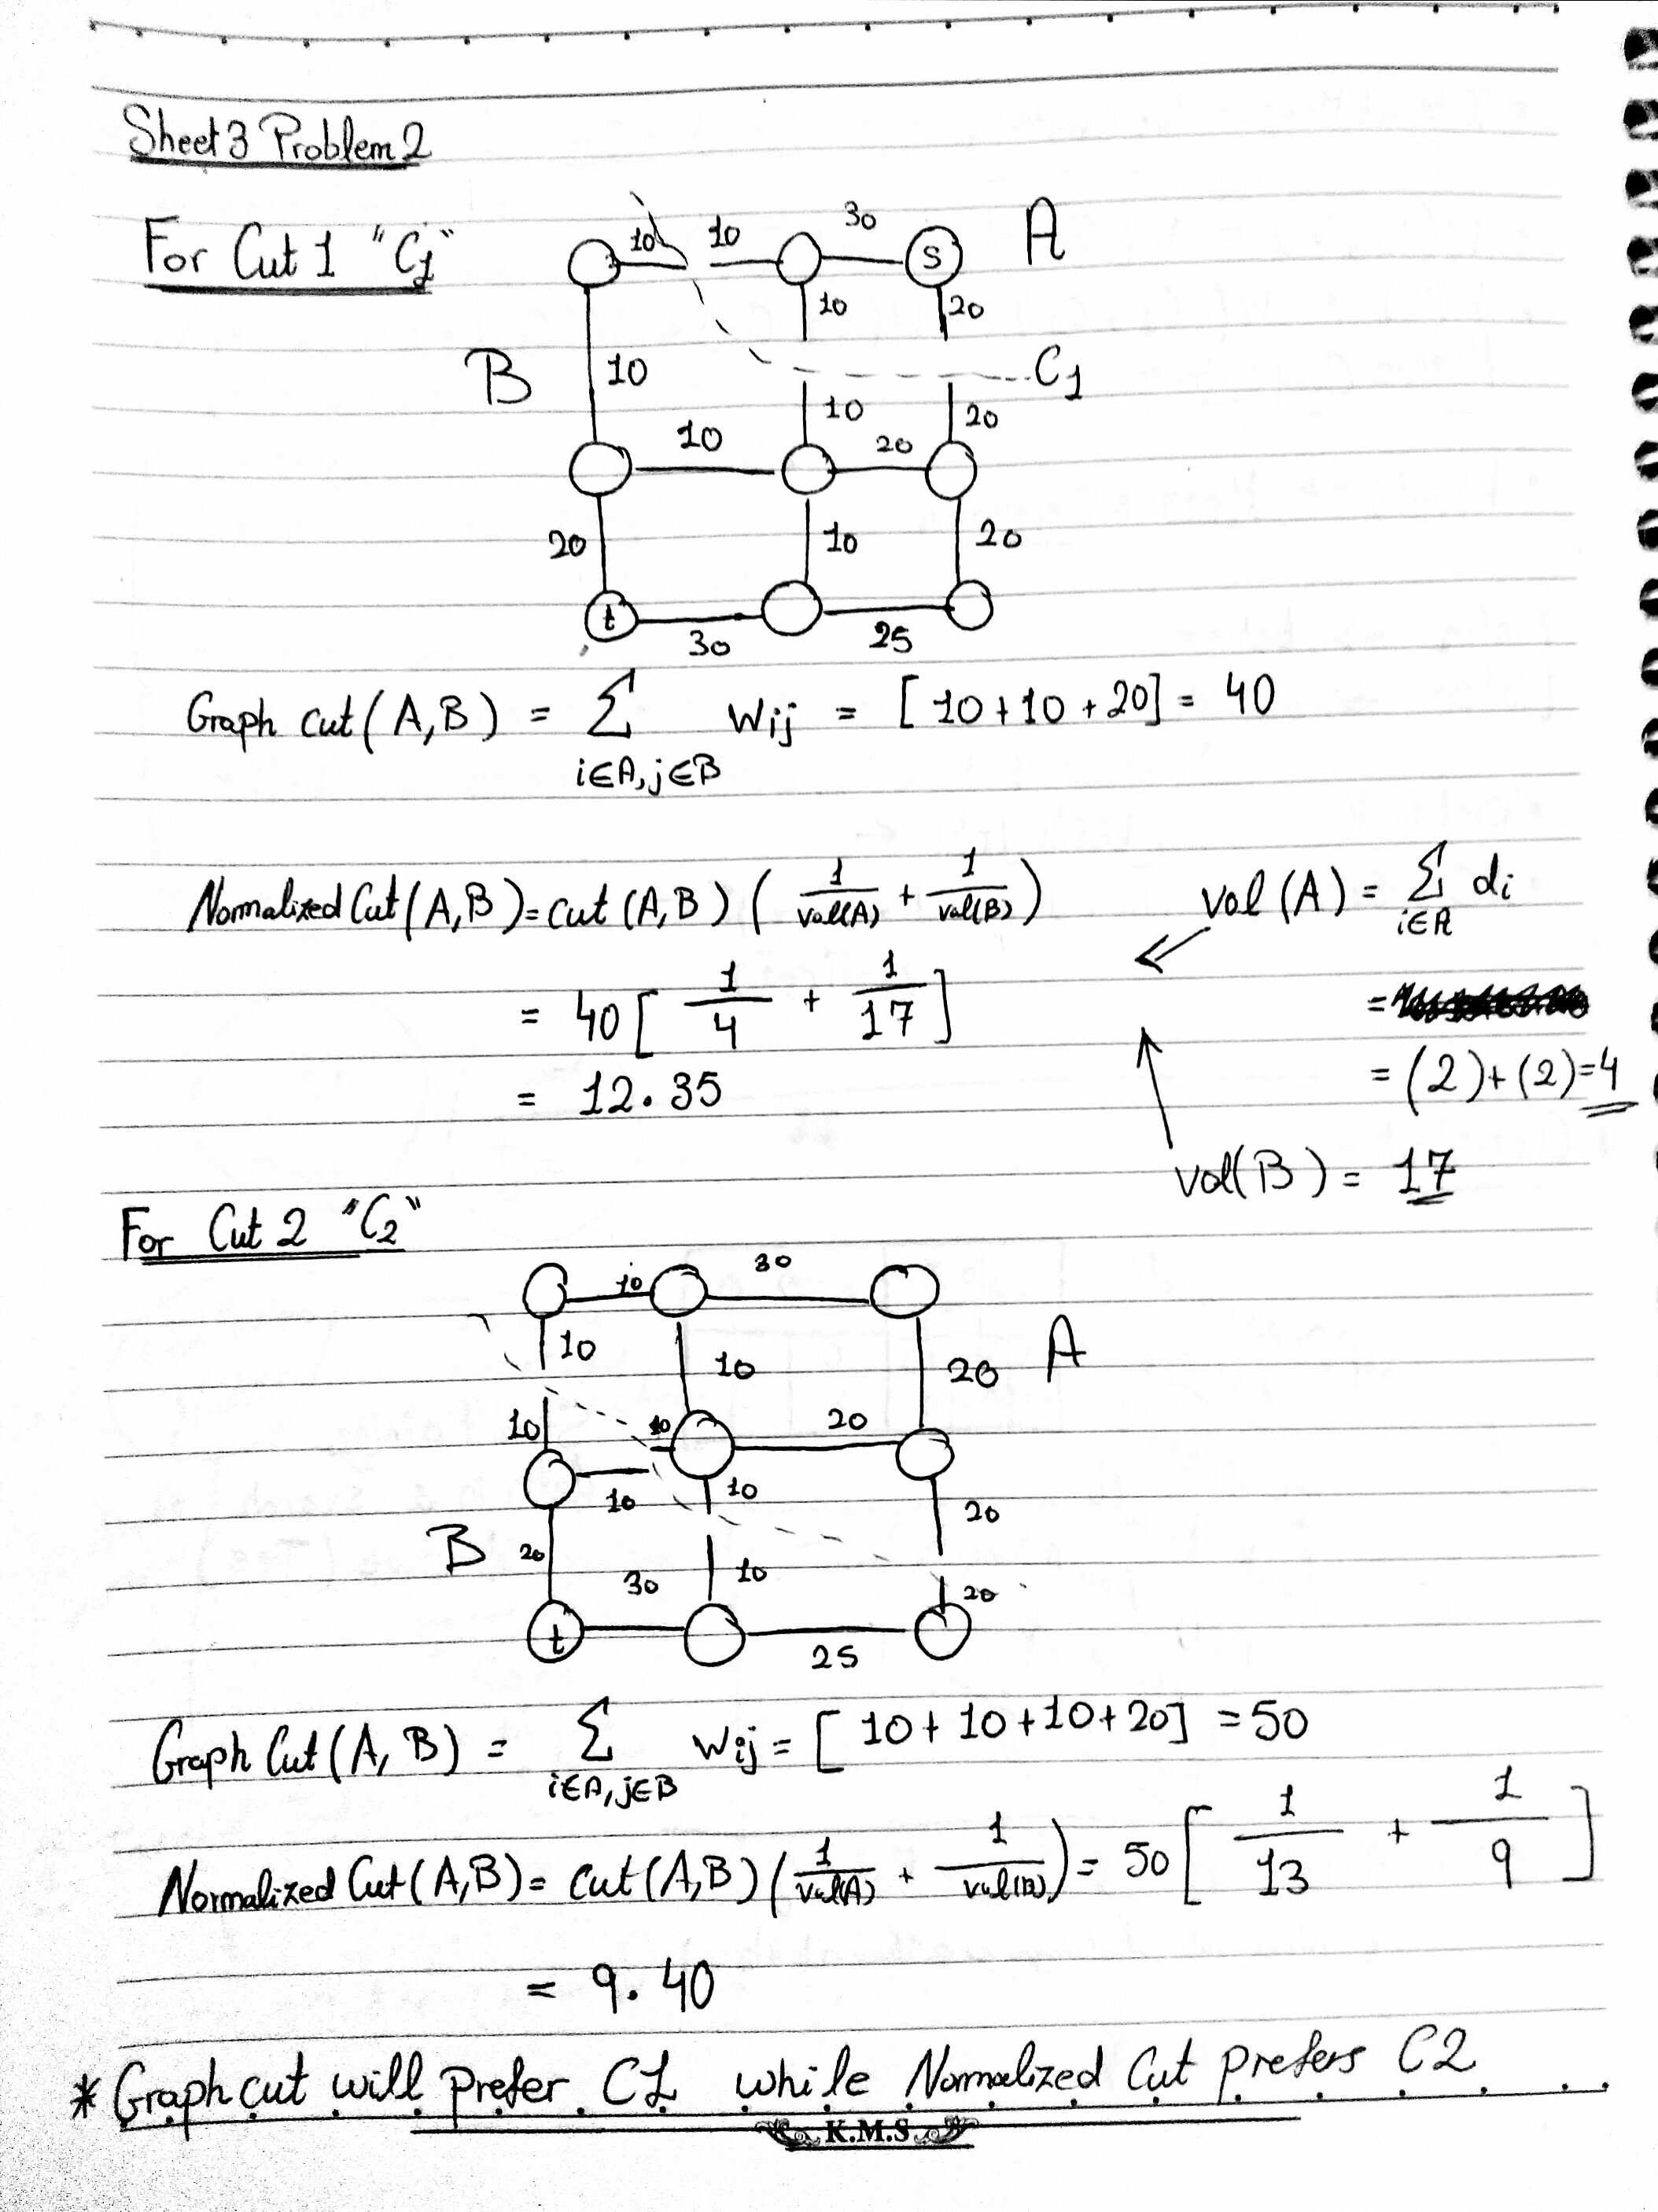

**Which cut will be favored by each algorithm?What is your explanation?**

Ans:<br>
As explained above Graph cut or Min cut will prefer the C1 cut while Normalized Cut will prefer the cut C2.<br>
It is intuitively clear that C2 is the better cut.The minimum cut criteria occasionally supports cutting isolated nodes in the graph due to the small values achieved by partitioning such nodes.<br>
Advantage of Normalized Cut is being an unbiased measure, the Ncut value with respect to the isolated nodes will be of a large percentage compared to the total connection from small set to all other nodes.

## Question 3 on Normalized Cut

**Write your python code to implement K ways normalized cut k=3**

In [279]:
def SpectralClustering(data, num_clusters=2, affinity='rbf', gamma=1.0, num_neighbors=3):
    if(affinity == 'rbf'):
        sim_matrix = rbf(data,data,gamma)
    #else if(affinity == 'knn'):
    deg_matrix = np.diag(np.sum(sim_matrix, axis=1))
    laplace_matrix = deg_matrix - sim_matrix
    asym_laplace_matrix = np.linalg.inv(deg_matrix) @ laplace_matrix 
    eig_values,eig_vectors = np.linalg.eig(asym_laplace_matrix)
    idx = eig_values.argsort()[:num_clusters]
    eig_vectors = eig_vectors[:,idx]
    normalized_eig_vectors = np.zeros(eig_vectors.shape)
    for i in range(eig_vectors.shape[0]):
        normalized_eig_vectors[i] = eig_vectors[i]/ np.linalg.norm(eig_vectors[i], axis=0)
    return normalized_eig_vectors,eig_values

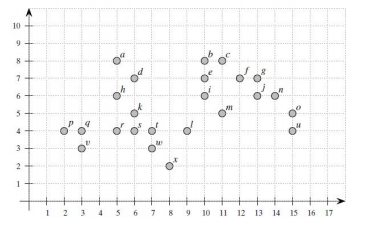

In [218]:
clustering_dataSet = np.array([[2,4],[3,3],[3,4],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],[7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],[11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])

[[ 0.40031141  0.5173857   0.75634834]
 [ 0.45533177  0.56413678  0.68878347]
 [ 0.47591177  0.58126518  0.66002938]
 [ 0.68246202  0.70169848  0.204609  ]
 [ 0.71562681  0.69499301  0.06973511]
 [ 0.73900598  0.66135196 -0.12838903]
 [ 0.73873002  0.66285507 -0.12207014]
 [ 0.74934365  0.64547547 -0.1478023 ]
 [ 0.76941218  0.58243265 -0.26225387]
 [ 0.72239789  0.5562932  -0.41070568]
 [ 0.74239186  0.53437838 -0.40409662]
 [ 0.66854009  0.4325236  -0.60496072]
 [ 0.71688269  0.10274542 -0.68958145]
 [ 0.68910383 -0.39301606 -0.60883026]
 [ 0.65425163 -0.44698669 -0.6100473 ]
 [ 0.62362834 -0.47389011 -0.62170399]
 [ 0.74028064 -0.55344323 -0.38168725]
 [ 0.63642035 -0.60195561 -0.48230548]
 [ 0.67359246 -0.72033054 -0.16552075]
 [ 0.6112519  -0.73561597  0.29195935]
 [ 0.63259202 -0.75718754  0.16277086]
 [ 0.50658686 -0.67065745  0.54183794]
 [ 0.35275167 -0.51747996  0.77960294]
 [ 0.38476853 -0.55477203  0.73768636]] [1.11022302e-16 1.21461656e-01 4.48874537e-01]


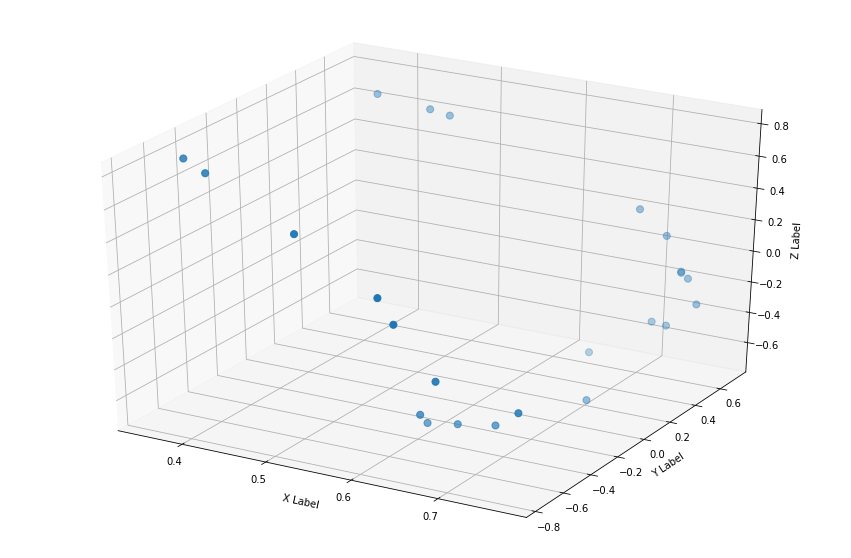

In [303]:
y_matrix,values = SpectralClustering(clustering_dataSet, num_clusters=3, affinity='rbf', gamma=0.1)
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
ax.scatter(y_matrix[:,0],y_matrix[:,1],y_matrix[:,2], s=50);
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');
values = values[values.argsort()[:3]]
print(y_matrix,values)

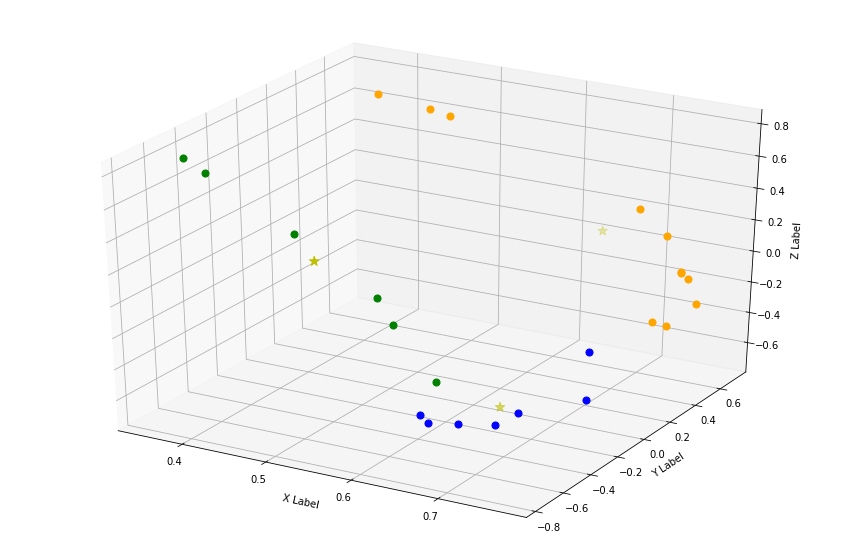

In [304]:
centroids, clusters, error,numofiter = kmeans(y_matrix, num_clusters=3)
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(y_matrix.shape[0]):
    ax.scatter(y_matrix[i,0],y_matrix[i,1],y_matrix[i,2], s=50, color = colors[clusters[i]]);
    
ax.scatter(centroids[:,0], centroids[:,1],centroids[:,2], marker='*', c='y',s=100)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');




Centroids are :  [[14.          5.6       ]
 [10.42857143  6.42857143]
 [ 5.25        4.5       ]]
Points assigned to Cluster :  [2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 0 0]
Error :  0.0


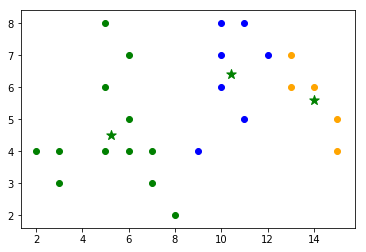

In [289]:
#running the algorithm for four epoch only and for initial seed given.
centroids, clusters, error,numofiter = kmeans(clustering_dataSet,num_clusters=3)
print("Centroids are : ",centroids)
print("Points assigned to Cluster : ",clusters)
print("Error : ",error)
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(clustering_dataSet.shape[0]):
    plt.scatter(clustering_dataSet[i, 0], clustering_dataSet[i,1],color = colors[clusters[i]])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g',s=100)